In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import noisereduce as nr 
from tqdm import tqdm

/Users/aiudd75/anaconda3/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
src = "audio/baba_old/S1.mp3"
dst = "audio/baba_old/S1.wav"

In [3]:
import sys
sys.path.append('/path/to/ffmpeg')

In [4]:
from pydub import AudioSegment
sound = AudioSegment.from_mp3(src)
sound.export(dst, format="wav",parameters=["-c:a", "pcm_u8"])

<_io.BufferedRandom name='audio/baba_old/S1.wav'>

In [5]:
ipd.Audio(dst)

In [7]:
signal3, sr3 = librosa.load(dst, sr=22050) # sr * T = 22050 * 2(sec)
voice_nr = nr.reduce_noise(audio_clip=signal3,noise_clip=signal3, verbose=False) 

In [8]:
ipd.Audio(voice_nr, rate=22050)

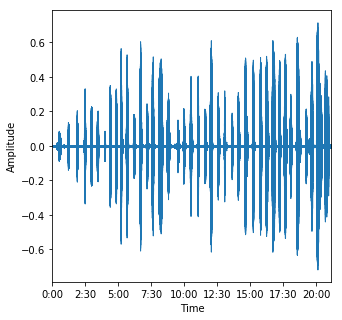

In [9]:
sr=22050
plt.figure(figsize=(5,5))
librosa.display.waveplot(voice_nr, sr=1000)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [10]:
intervals = librosa.effects.split(voice_nr, top_db=15)
chunks = len(intervals)

In [11]:
i=0
ipd.Audio(voice_nr[intervals[i][0]:intervals[i][1]], rate=22050)
print(intervals[i][1] - intervals[i][0])
print(np.power(2,13))

3072
8192


In [12]:
i=26
ipd.Audio(voice_nr[intervals[i][0]:intervals[i][1]], rate=22050)

In [13]:
# Find Min and Max gap

max_gap = 0
min_gap = 999999999
for i in range(len(intervals)):
    gap = intervals[i][1]-intervals[i][0]
    if gap > max_gap:
        max_gap = gap
        max_pos = i
    if gap < min_gap:
        min_gap = gap
        min_pos = i
print(f"Max Gap is {max_gap} and postion is {max_pos}")
print(f"Min Gap is {min_gap} and postion is {min_pos}")

Max Gap is 24576 and postion is 37
Min Gap is 2560 and postion is 26


In [14]:
# Equal intervals
equal_intervals = np.zeros((chunks,2), dtype=int)
size_of_chunks = 10000
# equal_intervals[0]
for i in range(chunks):
    chunk_length = intervals[i][1]-intervals[i][0]
#     print("Length", chunk_length)
    pad_size = int((size_of_chunks - chunk_length)/2)
#     print(pad_size)
    equal_intervals[i] = np.array([intervals[i][0]-pad_size,intervals[i][1]+pad_size])

In [15]:
i = 5
ipd.Audio(voice_nr[equal_intervals[i][0]:equal_intervals[i][1]], rate=22050)

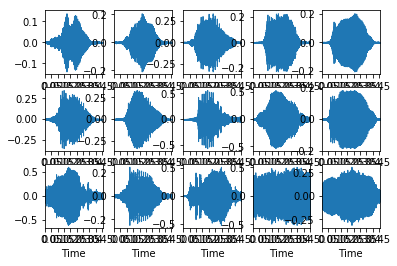

In [16]:
# plt.figure(figsize=(15,15))
fig, ax = plt.subplots(nrows=2, ncols=2)
for i in range(15):
    plt.subplot(3,5,i+1)
    x = equal_intervals[i][0]
    y = equal_intervals[i][1]
    sr=22050
    # plt.figure(figsize=(5,5))
    librosa.display.waveplot(voice_nr[x: y], sr=22050)
#     plt.xlabel('Time')
#     plt.ylabel('Amplitude')
plt.show()

In [17]:
import speech_recognition as sr
from numpy import inf
from pydub import AudioSegment
from pydub.playback import play
from pydub.silence import split_on_silence
import fleep

In [18]:
import scipy.io.wavfile
for i in range(len(intervals)):
    x = equal_intervals[i][0]
    y = equal_intervals[i][1]
    scipy.io.wavfile.write("audio/baba/G/G{0}.wav".format(i+1), sr3, voice_nr)

66680 76680 10000
(13, 51)
106104 116104 10000
(13, 51)
141432 151432 10000
(13, 51)
171384 181384 10000
(13, 51)
199800 209800 10000
(13, 51)
257400 267400 10000
(13, 51)
284280 294280 10000
(13, 51)
306040 316040 10000
(13, 51)
333176 343176 10000
(13, 51)
364920 374920 10000
(13, 51)
394360 404360 10000
(13, 51)
425080 435080 10000
(13, 51)
449656 459656 10000
(13, 51)
484472 494472 10000
(13, 51)
520312 530312 10000
(13, 51)


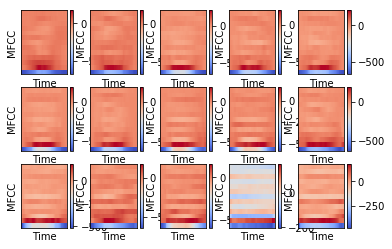

In [19]:
for i in range(15):
    plt.subplot(3,5,i+1)
    x = equal_intervals[i][0]
    y = equal_intervals[i][1]
    sr=22050 
    signal = voice_nr[x-1500: y+1500]
    fft = np.fft.fft(signal)
    n_fft = 2048
    hop_length = 256
    # stft = librosa.core.stft(signal3, hop_length = hop_length, n_fft=n_fft)
    # spectogram = np.abs(stft)
    print(x,y, y-x)
    MFCCs = librosa.feature.mfcc(voice_nr[x-1500: y+1500], n_fft = n_fft, hop_length= hop_length, n_mfcc= 13 )
    print(MFCCs.shape)
    librosa.display.specshow(MFCCs, sr = sr3, hop_length=hop_length)
    plt.xlabel('Time')
    plt.ylabel('MFCC')
    plt.colorbar()
plt.show()